<a href="https://colab.research.google.com/github/robyng15/Boolean-Models/blob/master/Yeast_Cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
file = open('yeast-cell.txt')
lines = file.readlines()

def list_gene_with_rule(locallines):
  length = len(locallines)
  keywds = ['or','and','not']
  gene_with_rule = []
  for i in range(length - 1):
    #print(lines[i+1])
    l = lines[i+1].strip('\n')
    gene_with_rule.append(l.split('\t'))
  return gene_with_rule
print(list_gene_with_rule(lines))

proteins = [item[0] for item in list_gene_with_rule(lines)]
rules = [item[1] for item in list_gene_with_rule(lines)]
#print(proteins)
#print(rules)

[['Cln3', '()'], ['MBF', '( Cln3 not Clb1 )'], ['SBF', '( Cln3 not Clb1 )'], ['Cln1', '( SBF )'], ['Cdh1', '( Cdc20 not Cln1 or Clb5 or Clb1 )'], ['Swi5', '( Mcm1 or Cdc20 not Clb1 )'], ['Cdc20', '( Mcm1 or Clb1 )'], ['Clb5', '( MBF not Sic1 or Cdc20 )'], ['Sic1', '( Swi5 or Cdc20 not Cln1 or Clb5 or Clb1 )'], ['Clb1', '( Mcm1 or Clb5 not Cdc20 or Cdh1 or Sic1 )'], ['Mcm1', '( Clb5 or Clb1 )']]


In [284]:
# Function to return formula depending on protein_id
def get_formula(protein_id, lines):
  for rule in list_gene_with_rule(list(lines)):
    if protein_id == rule[0]:
      return(rule[1])
print(get_formula('Mcm1', list(lines)))

( Clb5 or Clb1 )


In [0]:
# Perturbation by adding an edge
def perturb_edge_add():
  

In [335]:
# Inhibition and activation arrows are switched (29)
def find_activ_inhib(formula):
  #print(formula)
  tokens = []
  inhibitors = []
  activators = []
  if formula == '()':
    return [activators, inhibitors]
  else:
    token = formula.split(' ')
    for i in token:
      if i != '(' and i != ')' and i != 'not' and i != 'or':
        tokens.append(i) 
    for i in range(len(tokens)):
      if 'not' in token:
        if token.index(tokens[i]) < token.index('not'):
          activators.append(tokens[i])
        if token.index(tokens[i]) > token.index('not'):
          inhibitors.append(tokens[i])
      if 'not' not in token:
        activators.append(tokens[i])
    return([activators, inhibitors])
      
print(find_activ_inhib(get_formula('MBF', list(lines))))

[['Cln3'], ['Clb1']]


In [408]:
# Inhibition and activation arrows are switched (29)
def perturb_edge_reverse(proteins, activ_inhib):
  reverse_formula = []
  # Perturbs edge reverse for activators one at a time
  for k in range(len(rules)):
    activators = find_activ_inhib(rules[k])[0]
    inhibitors = find_activ_inhib(rules[k])[1]
    #print([activators, inhibitors])
    new_activ = []
    new_inhib = []
    perturb_activ = activators.copy()
    perturb_inhib = inhibitors.copy()
    for i in range(len(activators)):
      #print(activators[i])
      if len(activators) != 0:
        perturb_inhib.append(activators[i])
        perturb_activ.remove(activators[i])
        reverse_formula.append([proteins[k], [perturb_activ, perturb_inhib]])
        perturb_activ = activators
        perturb_inhib = inhibitors
   
  # Perturbs edge reverse for inhibitors one at a time
  for k in range(len(rules)):
    activators = find_activ_inhib(rules[k])[0]
    inhibitors = find_activ_inhib(rules[k])[1]
  #print([activators, inhibitors])
    new_activ = []
    new_inhib = []
    perturb_activ = activators.copy()
    perturb_inhib = inhibitors.copy()
    for j in range(len(list(inhibitors))):
      #print(inhibitors)
      if len(inhibitors) != 0:
        perturb_activ.append(inhibitors[j])
        perturb_inhib.remove(inhibitors[j])
        reverse_formula.append([proteins[k], [perturb_activ, perturb_inhib]])
        perturb_activ = list(activators)
        perturb_inhib = list(inhibitors)
  return reverse_formula

f = list()
for r in range(len(rules)):
  f.append(find_activ_inhib(rules[r]))
#print(f)

print(perturb_edge_reverse(proteins, f))
#print(len(perturb_edge_reverse(proteins, f)))

[['MBF', [[], ['Clb1', 'Cln3']]], ['SBF', [[], ['Clb1', 'Cln3']]], ['Cln1', [[], ['SBF']]], ['Cdh1', [[], ['Cln1', 'Clb5', 'Clb1', 'Cdc20']]], ['Swi5', [['Cdc20'], ['Clb1', 'Mcm1']]], ['Swi5', [['Mcm1'], ['Clb1', 'Cdc20']]], ['Cdc20', [['Clb1'], ['Mcm1']]], ['Cdc20', [['Mcm1'], ['Clb1']]], ['Clb5', [[], ['Sic1', 'Cdc20', 'MBF']]], ['Sic1', [['Cdc20'], ['Cln1', 'Clb5', 'Clb1', 'Swi5']]], ['Sic1', [['Swi5'], ['Cln1', 'Clb5', 'Clb1', 'Cdc20']]], ['Clb1', [['Clb5'], ['Cdc20', 'Cdh1', 'Sic1', 'Mcm1']]], ['Clb1', [['Mcm1'], ['Cdc20', 'Cdh1', 'Sic1', 'Clb5']]], ['Mcm1', [['Clb1'], ['Clb5']]], ['Mcm1', [['Clb5'], ['Clb1']]], ['MBF', [['Cln3', 'Clb1'], []]], ['SBF', [['Cln3', 'Clb1'], []]], ['Cdh1', [['Cdc20', 'Cln1'], ['Clb5', 'Clb1']]], ['Cdh1', [['Cdc20', 'Clb5'], ['Cln1', 'Clb1']]], ['Cdh1', [['Cdc20', 'Clb1'], ['Cln1', 'Clb5']]], ['Swi5', [['Mcm1', 'Cdc20', 'Clb1'], []]], ['Clb5', [['MBF', 'Sic1'], ['Cdc20']]], ['Clb5', [['MBF', 'Cdc20'], ['Sic1']]], ['Sic1', [['Swi5', 'Cdc20', 'Cln1'], ['

In [406]:
for i in range(len(list_gene_with_rule(lines))):
  formula = get_formula(list_gene_with_rule(lines)[i][1], list(lines))
print(formula)

None


In [407]:
def compute_protein_state(proteins, formula, net_state):
  #activators = find_activ_inhib(formula)[0]
  #inhibitors = find_activ_inhib(formula)[1]
  #tokens = []
  #regs = [i[0] for i in list_gene_with_rule(lines)]
  for i in range(len(list_gene_with_rule(lines))):
    formula = get_formula(list_gene_with_rule(lines)[i][1], list(lines))
  print(formula)
  for i in range(len(perturb_edge_reverse(proteins, f))):
    activators = [[i][1][0] for i in perturb_edge_reverse(proteins, f)]
    inhibitors = [[i][1][1] for i in perturb_edge_reverse(proteins, f)]
  print([activators, inhibitors])
 
  # Sets activators to 1 if on, and inhibitors to -1 if on
  for i in activators:
    if net_state[proteins.index(i)] == 1:
      activators[activators.index(i)] = 1
    else:
      activators[activators.index(i)] = 0
  #print(activators)
  for i in inhibitors:
    if net_state[proteins.index(i)] == 1:
      inhibitors[inhibitors.index(i)] = -1
    else:
      inhibitors[inhibitors.index(i)] = 0
  #print(inhibitors)

  # Finds sum of activators list and inhibitors list
  if len(activators) == 0:
    sum_activators = 0
  else:
    sum_activators = sum(activators)
  #print(sum_activators)
  if len(inhibitors) == 0:
    sum_inhibitors = 0
  else:
    sum_inhibitors = sum(inhibitors)
  #print(sum_inhibitors)
  
  # Find sum of activators list with inhibitors list to assign value for state
  final_count = sum_activators + sum_inhibitors
  #print(final_count)
  if final_count == 0 and (len(inhibitors) == 0 or prot == 'Swi5'):
    return 0
  if final_count > 0:
    return 1
  if final_count < 0:
    return 0
  if final_count == 0:
    index = regs.index(prot)
    return net_state[index]
      
# print(compute_protein_state('Swi5', [0,0,0,0,0,1,0,0,0,0,0]))
print(compute_protein_state(proteins, formula, [0,0,0,0,0,0,0,0,0,0,0]))

None


IndexError: ignored

In [9]:
def compute_next_protein_state_synchronous(gene_with_rule, net_state, lines):
  next_state_list = list(net_state)
  #print(gene_with_rule)
  #print(next_state[0])
  #print(list_gene_with_rule(lines))
  prot = [i[0] for i in gene_with_rule]
  #print(prot)
  for i in range(len(proteins)):
    formula = get_formula(proteins[i], lines)
    new_state_value = compute_protein_state(prot[i], net_state)
    next_state_list[i] = new_state_value
  return next_state_list

print(compute_next_protein_state_synchronous(list_gene_with_rule(lines), [0,0,0,1,0,1,1,1,1,0,0], lines))

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]


In [10]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

def compute_state_space_network_synchronous(gene_with_rule, net_state):
  # creates a list of all the possible states depending on amt of proteins
  all_states = list(map(list, itertools.product([0, 1], repeat = len(proteins))))
  #print(len(all_states))
  start_state = all_states[0]
  used_states = all_states[0]
  edgelist = []
  for start_state in all_states:
    next_state_space = compute_next_protein_state_synchronous(gene_with_rule, 
                                                              start_state, 
                                                                lines)
    edgelist.append((start_state, next_state_space))
  return edgelist

output = compute_state_space_network_synchronous(list_gene_with_rule(lines), [0,0,0,0,0,0,0,0,0,0,0])
print(output)
#print(len(output))

[([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]), ([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), ([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], [0, 0, 0, 0, 0, 1, 1, 0, 0,

[('00000000000', '00000000000'), ('00000000001', '00000110010'), ('00000000010', '00000010011'), ('00000000011', '00000010011'), ('00000000100', '00000000100'), ('00000000101', '00000110100'), ('00000000110', '00000010001'), ('00000000111', '00000010011'), ('00000001000', '00000001011'), ('00000001001', '00000111011'), ('00000001010', '00000011011'), ('00000001011', '00000011011'), ('00000001100', '00000000001'), ('00000001101', '00000110011'), ('00000001110', '00000010011'), ('00000001111', '00000010011'), ('00000010000', '00001100100'), ('00000010001', '00001110100'), ('00000010010', '00000010001'), ('00000010011', '00000110011'), ('00000010100', '00001100100'), ('00000010101', '00001110100'), ('00000010110', '00000010101'), ('00000010111', '00000110101'), ('00000011000', '00000100001'), ('00000011001', '00000110011'), ('00000011010', '00000010011'), ('00000011011', '00000110011'), ('00000011100', '00000100101'), ('00000011101', '00000110101'), ('00000011110', '00000010001'), ('00000

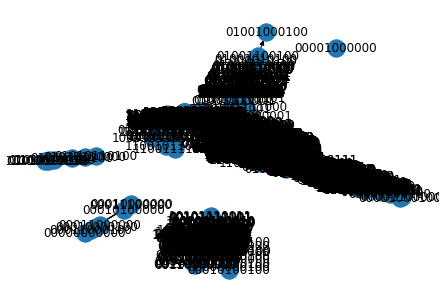

In [0]:
edgelist = []
for seq in output:
  sequence = seq
  edgelist.append((''.join([str(st) for st in seq[0]]),
                   ''.join([str(st) for st in seq[1]])))
print(edgelist)
G = nx.DiGraph(edgelist)
#print(list(nx.simple_cycles(G)))
nx.draw_spring(G, with_labels=True)
  
#plt.savefig('state_space_network_synchronous_yeast.png')

In [0]:
# Limit Cycle Sync
def find_limit_cycle(G):
  limit_cycle = list()
  cycle = list(nx.simple_cycles(G))
  return cycle

print(find_limit_cycle(G))
#print(len(find_limit_cycle(G)))

[['00000000000'], ['00000000100'], ['00001000100'], ['00001000000'], ['00110000000'], ['01000000100'], ['01001000100']]


In [0]:
# Actual Limit Cycle Sync
def find_longer_list(G):
  limit_cycle = find_limit_cycle(G)
  long_limit_cycle = []
  for i in limit_cycle:
    if len(i) != 1:
      long_limit_cycle.append(i)
      return long_limit_cycle

print(find_longer_list(G))

None


In [0]:
# Self Cycles Sync
def find_self_cycle(G):
  self_cycle = []
  G = nx.DiGraph(edgelist)
  self_loop_edges = list(nx.selfloop_edges(G))
  state = [node[0] for node in self_loop_edges]
  return state

print(find_self_cycle(G))
#print(len(find_self_cycle(G)))

['00000000000', '00000000100', '00001000000', '00001000100', '00110000000', '01000000100', '01001000100']


In [0]:
# Find steady states Sync
def find_steady_states(G):
  steady_states = []
  for node in G.nodes():
    if len(list(G.neighbors(node))) == 0 or len(list(G.neighbors(node))) == 1 and (node in G.neighbors(node)):
      steady_states.append(node)
  return steady_states
print(find_steady_states(G))
print(len(find_steady_states(G)))

['00000000000', '00000000100', '00001000000', '00001000100', '00110000000', '01000000100', '01001000100']
7


In [0]:
# Graphspace Synchronous
def graphspace_synchronous(edgelist, G):
  nodes = G.nodes()
  edges = G.edges()
  limit_cycle = find_longer_list(G)
  steady_states = find_steady_states(G)
  #random_walk = individual_random_walk(nodes)
  #edges_count = count_edges(G)
  #scaled_edges = max_count_edges(G)
  #nodes_count = count_nodes(G)
  #scaled_nodes = max_count_nodes(G)
  
  file_name = open('yeast_synchronous.txt', 'w+')
  file_name.write('head\ttail\thead_label\ttail_label\tedge_popup\tstyle\n')

  head = "{\"head\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  tail = "\"tail\": {'spec': {'shape': '%s','color': '%s','border': \"black\"}, \"id\": '%s'},"
  edge = "\"edge\": {'spec': {\"target-arrow-shape\": 'triangle', \"color\": '%s'}, \"id\": '%s-%s'}}\n"

  style = head + tail + edge 

  for i in range(0, len(edgelist)):
    if limit_cycle != None:
      if edgelist[i][0] in limit_cycle:
        edge_color = 'blue'
      else:
        edge_color = 'grey'
    else:
      edge_color = 'grey'
    
    if edgelist[i][0] in steady_states:
      shape1 = 'rectangle'
      color1 = 'red'
      edge_color = 'grey'
    else:
      shape1 = 'ellipse'
      color1 = 'grey'
      edge_color = 'grey'
    
    if edgelist[i][1] in steady_states:
      shape2 = 'rectangle'
      color2 = 'red'
    else:
      shape2 = 'ellipse'
      color2 = 'grey'   
      
#     if edgelist[i] in scaled_edges.keys():
#       if scaled_edges[edgelist[i]] == 0.0:
#         edge_width = 1.0
#       else:
#         edge_width = scaled_edges[edgelist[i]]
      
#     if edgelist[i][0] in scaled_nodes.keys():
#       if scaled_nodes[edgelist[i][0]] == 0.0:
#         opacity1 = 0.25
#       else:
#         opacity1 = scaled_nodes[edgelist[i][0]]

#     if edgelist[i][1] in scaled_nodes.keys():
#       if scaled_nodes[edgelist[i][1]] == 0.0:
#         opacity2 = 0.25
#       else:
#         opacity2 = scaled_nodes[edgelist[i][1]]
     
      
    file_name.write("%s\t%s\t%s\t%s\t-\t" % (edgelist[i][0], edgelist[i][1], edgelist[i][0], edgelist[i][1]))
#     file_name.write(style % (shape1, color1, opacity1, edgelist[i][0], shape2, color2, opacity2, edgelist[i][1], 
#                              edge_color, edge_width, edgelist[i][0], edgelist[i][1]))
    file_name.write(style % (shape1, color1, edgelist[i][0], shape2, color2, edgelist[i][1],
                              edge_color, edgelist[i][0], edgelist[i][1]))
    
  file_name.close()   
print(graphspace_synchronous(edgelist, G))

None


In [0]:
file_name = open('yeast_synchronous.txt', 'r+')
print(file_name.read())

head	tail	head_label	tail_label	edge_popup	style
00000000000	00000000000	00000000000	00000000000	-	{"head": {'spec': {'shape': 'rectangle','color': 'red','border': "black"}, "id": '00000000000'},"tail": {'spec': {'shape': 'rectangle','color': 'red','border': "black"}, "id": '00000000000'},"edge": {'spec': {"target-arrow-shape": 'triangle', "color": 'grey'}, "id": '00000000000-00000000000'}}
00000000001	00000110010	00000000001	00000110010	-	{"head": {'spec': {'shape': 'ellipse','color': 'grey','border': "black"}, "id": '00000000001'},"tail": {'spec': {'shape': 'ellipse','color': 'grey','border': "black"}, "id": '00000110010'},"edge": {'spec': {"target-arrow-shape": 'triangle', "color": 'grey'}, "id": '00000000001-00000110010'}}
00000000010	00000010011	00000000010	00000010011	-	{"head": {'spec': {'shape': 'ellipse','color': 'grey','border': "black"}, "id": '00000000010'},"tail": {'spec': {'shape': 'ellipse','color': 'grey','border': "black"}, "id": '00000010011'},"edge": {'spec': {"targe